In [222]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk 
import sqlalchemy
import seaborn as sns
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn import metrics

import xgboost as xgb


%matplotlib inline

In [223]:
def convertNA(values):
    try:
        if np.isnan(values):
            return "None"
        else:
            return values
    except:
        return values

In [224]:
def cleanData(frame,categories):
    for column in categories:
        frame[column] = frame[column].apply(convertNA)
    return frame

In [225]:
class MultiColumnLabelEncoder(TransformerMixin):
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = pd.DataFrame(X,columns=self.columns)
        #print output.head()
        for colname,col in output.iteritems():
            if(output[colname].dtype == "object"):
                output[colname] = LabelEncoder().fit_transform(col)
            else:
                output[colname] = col
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [230]:
trainDF  = pd.read_csv("../assets/train.csv")
testDF = pd.read_csv("../assets/test.csv")

In [227]:
ids = testDF["Id"]
target = 'SalePrice'
IDcol = 'Id'
columnsToClean = ["Alley","Fence","PoolQC","GarageCond","GarageQual","GarageFinish","MiscFeature","GarageType","FireplaceQu","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual"]

trainDF = cleanData(trainDF,columnsToClean)
testDF = cleanData(testDF,columnsToClean)

trainDF.fillna(trainDF.median(),inplace=True)
testDF.fillna(testDF.median(),inplace=True)

mcle = MultiColumnLabelEncoder()

trainDF = mcle.fit_transform(trainDF)
testDF = mcle.fit_transform(trainDF)

testDF["Id"] = ids

testDF = testDF[testDF.Id != np.NaN]
testDF = testDF.iloc[:-1,:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461.0,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,1462.0,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,1463.0,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,1464.0,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,1465.0,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000
5,1466.0,50,3,85.0,14115,1,1,0,3,0,...,0,3,2,3,700,10,2009,8,4,143000
6,1467.0,20,3,75.0,10084,1,1,3,3,0,...,0,3,4,1,0,8,2007,8,4,307000
7,1468.0,60,3,69.0,10382,1,1,0,3,0,...,0,3,4,3,350,11,2009,8,4,200000
8,1469.0,50,4,51.0,6120,1,1,3,3,0,...,0,3,4,1,0,4,2008,8,0,129900
9,1470.0,190,3,50.0,7420,1,1,3,3,0,...,0,3,4,1,0,1,2008,8,4,118000


## XGBOOST

In [231]:
def modelfit(alg, dtrain, dtest, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    X_train, X_test, y_train, y_test = train_test_split(dtrain[predictors].values, dtrain[target].values, test_size=0.3, random_state=42)
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions = alg.predict(dtest[predictors])
    
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    #Print model report:
    print "\nModel Report"
    #print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['SalePrice'].values.astype(float), dtrain_predictions.astype(float))
    #print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['SalePrice'], dtrain_predprob)
    print "Score: ", metrics.r2_score(dtrain["SalePrice"],dtrain_predictions)
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    submission = pd.DataFrame()
    
    print len(dtest["Id"])
    print len(dtest_predictions)
    
    submission["Id"] = dtest["Id"].values.astype(int)
    submission["SalePrice"] = dtest_predictions
    
    print submission

    submission.to_csv("../assets/submission.csv", index=False)
    


Model Report
Score:  0.993683540085
1459
1459
        Id      SalePrice
0     1461  202437.421875
1     1462  174686.625000
2     1463  217911.250000
3     1464  142273.296875
4     1465  263127.218750
5     1466  146645.953125
6     1467  297535.062500
7     1468  209094.359375
8     1469  127282.257812
9     1470  125276.804688
10    1471  126922.507812
11    1472  350812.656250
12    1473  139114.234375
13    1474  254354.609375
14    1475  153386.421875
15    1476  139434.875000
16    1477  146069.046875
17    1478  105263.617188
18    1479  155847.078125
19    1480  136074.125000
20    1481  325601.656250
21    1482  136835.343750
22    1483  229642.640625
23    1484  138550.234375
24    1485  150508.906250
25    1486  251591.125000
26    1487  136889.875000
27    1488  307551.781250
28    1489  201201.328125
29    1490   67066.476562
...    ...            ...
1429  2890  190130.718750
1430  2891  181931.453125
1431  2892  137173.125000
1432  2893   82413.468750
1433  2894  18275

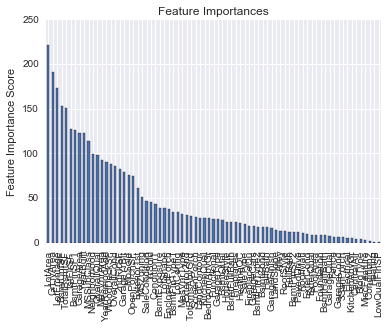

In [229]:
predictors = [x for x in trainDF.columns if x not in [target, IDcol]]
xgb1 = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model = modelfit(xgb1, trainDF, testDF, predictors, target)
